In [1]:
import pandas as pd
import numpy as np
from joblib import load
import seaborn as sns
import random

/home/saif/anaconda3/lib/python3.8/site-packages/sklearn/base.py:329: UserWarning: Trying to unpickle estimator StandardScaler from version 0.24.2 when using version 0.23.2. This might lead to breaking code or invalid results. Use at your own risk.
  warnings.warn(


[0.66454721 0.65300688 0.6334287  0.67249394 0.63709765 0.66751975
 0.7001627  0.68913807 0.63709765 0.76355452 0.75550984 0.65744876
 0.72394197 0.63656058 0.75257857 0.65158146 0.68784846 0.77912406
 0.68799041 0.68562222 0.77845448 0.8827532  0.64305219 0.75587613
 0.71035542 0.64194056 0.75674706 0.8827532  0.74713759 0.66482705
 0.64034139 0.67199227 0.7337272  0.65300236 0.75695227 0.72026448
 0.71703797 0.67197605 0.80133976 0.69322761 0.8380404  0.6454926
 0.68681442 0.68617063 0.75796856 0.66485023 0.65300236 0.71246128
 0.75542741 0.6679982  0.66482705 0.65300236 0.63358772 0.64766372
 0.64194056 0.92131982 0.67232463 0.6486162  0.70076073 0.62836112
 0.69045389 0.73359754 0.69750732 0.81899437 0.86717376 0.70319308
 0.65744876 0.6937837  0.66806682 0.63865463 0.66482705 0.71342715
 0.69963244 0.76584683 0.74888756 0.63947765 0.71876459 0.92760754
 0.73346473 0.66594592 0.75491603 0.80594059 0.6392351  0.69855535
 0.77251777 0.74574197 0.68440379 0.78554446 0.72411869 0.63709

<AxesSubplot:>

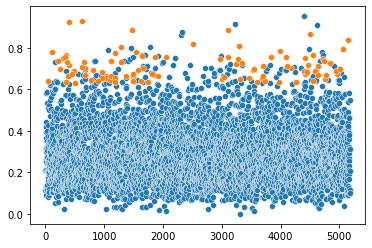

In [9]:
total_anoamlies = 100
model = load('../output/model/census2/clf_autoencoder_2.joblib')
df_normal = pd.read_csv('../output/dataset/census2/x_test.csv')
df_anomalous = pd.read_csv('../output/dataset/census2/x_test.csv')
df_anomalous['education'] = 16
df_anomalous['education_num'] = 1
df_anomalous['age'] = 78
df_anomalous['sex'] = 19
x_anomalous = df_anomalous.sample(n=100).to_numpy()
# df_anomalous = df_normal.copy()
# df_anomalous = df_anomalous.head(total_anoamlies)
# df_anomalous = df_anomalous.loc[df_anomalous['hours_per_week'] > 85]
# df_anomalous['hours_per_week'] = 89
# df_anomalous['education_num'] = 1
x_normal = df_normal.to_numpy()
# x_anomalous = df_anomalous.to_numpy()
score_normal = model.predict_proba(x_normal)[:,1]
randomlist = random.sample(range(0, len(score_normal)), total_anoamlies)
# x_anomalous = np.loadtxt('age_hpw_anomaly.txt', dtype=int)
score_anomalous = model.predict_proba(x_anomalous)[:,1]
print(score_anomalous, score_normal)
sns.scatterplot(y=score_normal, x=list(range(len(score_normal))))
sns.scatterplot(y=score_anomalous, x=randomlist)
# print(model.predict_proba(x_normal))
# print(model.predict_proba(np.zeros(len(x_normal[0])).reshape(1,-1)))